----
# Laboratorium 3 - Zespolony szereg Fouriera
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznański

----
## 0 Zagadnienia do opanowania przed zajęciami:
---- 
### 0.1 Wyznaczanie współczynników zespolonego szeregu Fouriera
### 0.2 Zbieżność szeregu Fouriera
### 0.3 Efekt Gibbsa
*Literatura:*
- wykłady i ćwiczenia z przedmiotu Teoria Sygnałów
- R. Gabel, R. Robeerts, Sygnały i systemy liniowe, str. 181-197
- J. Izydorczyk, G. Płonka, G. Tyma, Teoria sygnałów, str. 1-19

### 0.4 Używanie języka Python, szczególnie biblioteki *sympy* w zakresie operacji całkowania oraz używania funkcji ekspotencjalnej, oraz funkcjonalności lambdify i Piecewise. Obsługa sympy w zakresie definiowania zmiennych i funkcji (sympy.symbol). 
- https://docs.sympy.org/latest/modules/integrals/integrals.html
- https://docs.sympy.org/latest/modules/functions/elementary.html#sympy-functions-elementary-exponential
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html

### 0.5 Określanie wzoru funkcji w zadanym przedziale na podstawie jej wykresu.

In [1]:
%matplotlib inline
import sympy 
import numpy as np
import matplotlib.pyplot as plt 

----
## 1. Określanie wzorów funkcji
----
### Zadanie: Na podstawie poniższych wykresów określ wzór funkcji w odpowiednim zakresie wartości
<table><tr><td>
Funkcja A
<br>
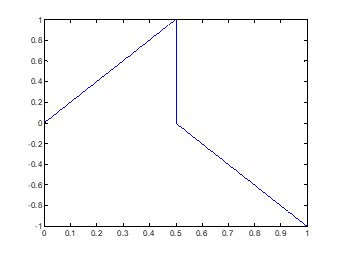
</td><td>
Funkcja B
<br>
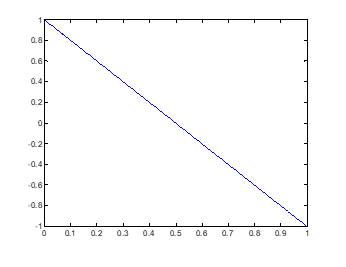
</td><td>
Funkcja C
<br>
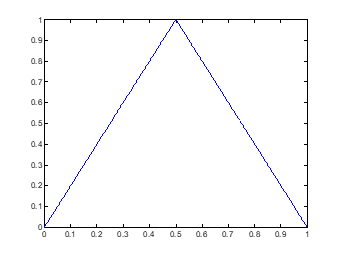
</td></tr><tr><td>
Funkcja D
<br>
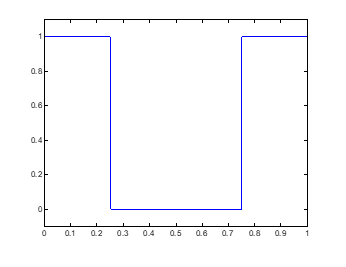
</td><td>
Funkcja E
<br>
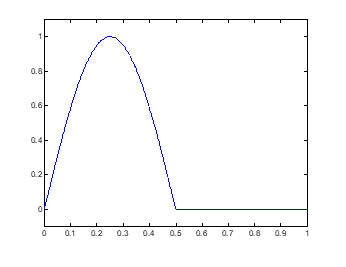
</td><td>
Funkcja F
<br>
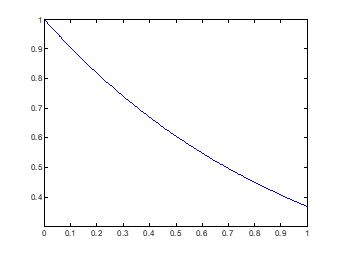
</td></tr>

----
## 2. Wyliczanie próbek funkcji
----
### Zadanie: Zdefiniuj wektor zawierający próbki jednego okresu badanej funkcji (składający się z przynajmniej 200 elementów). Wyświetl wyznaczone próbki na wykresie (matlplotlib). 
Definicje funkcji uzależnij od `T`.  
Podpowiedź: użyj `sympy.Piecewise` do zdefiniowania funkcji oraz `sympy.lambdify` 


1


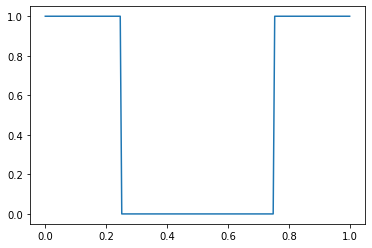

In [17]:
import sympy 
import numpy as np
import matplotlib.pyplot as plt 

#declare symbolic variable t (time) and period (T=1)
t = sympy.Symbol('t', real = 'True', nonzero = 'True') 
T = 1 #długość okresu

#declare functions (fA, fB, ... fF)
#sympy.Picewise() służy do deklaracji funkcji z rózymi wzorami na różnych przedziałach
fA = sympy.Piecewise((2*t/T, t<=T/2),(1-2*t/T, t>T/2)) #wzory funkcji w poszeczególnych przedzaiłach dla okresu T, w nawiasach przedały w których funkcja się zmienia
fB = (-2*t)+1/T #+1, bo dla 0 przyjmuje wartość 1
fC = sympy.Piecewise((2*t/T, t<=T/2), ((-2*t+2)/T, t>T/2))
fD = sympy.Piecewise((1, t<=T/4), (0, t<=3*T/4), (1, t>=3*T/4))
fE = sympy.Piecewise(((sympy.sin(2*sympy.pi*t/T)), t<=T/2), (0, t>T/2)) #sinus symboliczny z symby coś innego niż nympy
fF = sympy.exp(-t/T)
fG = sympy.Piecewise((sympy.sin(2*sympy.pi*t/T), t<=T/2), (sympy.cos(2*sympy.pi*t/T), t<=T))
#select one function
currFun = fD
print(fD.subs(t,1)) #wartość funkcji w punkcie
lam_current = sympy.lambdify(t, currFun, 'numpy') #utworzenie wzoru funkcji dla którego podstawiamy prawdziwe wartości t
t_vals = np.linspace(0, T, 200) #próbki na osi t, argumenty
f_vals = lam_current(t_vals) #wartośći funkcji currFun(t), podstawienie pod funkcję
plt.plot(t_vals, f_vals)




#plot the selected function
NumberOfSamples = 200



----
## 3. Wyznaczanie współczynników szeregu Fouriera (analityczne)
----
### Zadanie: Na podstawie wyznaczonych wzorów funkcji znajdź rozwinięcie funkcji w szereg Fouriera. Skorzystaj z biblioteki sympy w środowisku Python. 
- Jakie założenie należy przyjąć przy wyznaczaniu współczynników szeregu Fouriera ?

$$ f(t) = \sum_{k=-\infty}^{\infty} F_k e^{j k {{2 \pi } \over T } t} \text{   for:   } k \in \mathbb{C} $$ 

$$ F_0 = { 1 \over T } \int\limits_{-{T \over 2}}^{{T \over 2}}f(t)dt  $$

$$ F_k = { 1 \over T } \int\limits_{-{T \over 2}}^{{T \over 2}} f(t) e^{-jkt {2\pi \over T}} dt \text{   for:   } k \in \mathbb{C}, k \neq 0 $$

Podpowiedź: funkcje `sympy.exp`, `sympy.simplify`, `sympy.integrate`

In [32]:
#declare symbolic variable k
k = sympy.Symbol('k', real = 'True', nonzero=True, positive=True, integer=True)

def determineFourierCoefficients(Function, RangeBeg, RangeEnd, DisplayCoeffs=True):
    #determine F0
    F0 = (1/T)*sympy.integrate(currFun, (t, RangeBeg, RangeEnd))
    #determine Fk
    #Trzeba pamiętać że musi być sympy.exp(), sympy.sqrt() itp. przy tworzeniu wzorów
    Fk = (1/T)*sympy.integrate((currFun*sympy.exp(-sympy.I * k * t * 2*sympy.pi/T)), (t, RangeBeg, RangeEnd))
    Fk = sympy.simplify(Fk)
    return F0, Fk

F0, Fk = determineFourierCoefficients(currFun, 0, T)
print("F0: ")
display(F0)
print("Fk: ")
display(Fk)
display(Fk.subs(k,2))

F0: 


0.500000000000000

Fk: 


-0.5*I*exp(-1.5*I*pi*k)/(pi*k) + 0.5*I*exp(-0.5*I*pi*k)/(pi*k)

0.25*I*exp(-1.0*I*pi)/pi - 0.25*I*exp(-3.0*I*pi)/pi

F0 = (0.3183098862+0j)
F1 = (-0-0.25j)
F2 = (-0.1061032954+0j)
F3 = (-0+0j)
F4 = (-0.0212206591+0j)
F5 = (-0+0j)
F6 = (-0.0090945682+0j)
F7 = (-0+0j)
F8 = (-0.0050525379+0j)
F9 = (-0+0j)
F10 = (-0.0032152514+0j)
F11 = (-0+0j)
F12 = (-0.0022259433+0j)
F13 = (-0+0j)
F14 = (-0.0016323584+0j)
F15 = (-0+0j)
F16 = (-0.0012482741+0j)
F17 = (-0+0j)
F18 = (-0.0009854795+0j)
F19 = (-0+0j)


<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in true_divide
  return select([not_equal(k, 1),True], [-0.5*((-1)**k + 1)/(pi*(k**2 - 1)),-0.25*1j], default=nan)


----
## 4. Wyznaczanie wartości pierwszych 10 współczynników szeregu Fouriera
---- 
Zadanie: Wygeneruj wektor zawierający 10 pierwszych współczynników szeregu Fouriera

Podpowiedz: wykorzystaj funkcje z poprzednich zadań, pamiętaj że współczynniki zespolonego szeregu Fouriera należą do zbioru liczb **ZESPOLONYCH** (użyj odpowiedniego typu danych - `np.cdouble`)

In [27]:
#create array containing calculated coefficients
coeffF0 = np.array(F0, dtype='cdouble') #oblicza F0 i wpsije do tablicy
coeffFk = np.cdouble(sympy.lambdify(k, Fk, 'numpy')(np.arange(1,20))) #oblicza Fk, dla każdego k od 1-10, k jest parametrem pod nią podstawiamy koljne numery
coeff = np.append(coeffF0, coeffFk) #połączenie coeffF0 i coeffFk w jednym wektorze
#print array content
for ki, iFk in enumerate(coeff): #pętla ki - kolejne numery wspolczynnika, iFk - kolejne obliczone Fk
    print("F{} = {}".format(ki, iFk.round(10))) #ładne wyświetlanie w nawiasach klamrowych beda zmienne



F0 = (0.5+0j)
F1 = (0.3183098862-0j)
F2 = (-0+0j)
F3 = (-0.1061032954+0j)
F4 = -0j
F5 = (0.0636619772-0j)
F6 = (-0+0j)
F7 = (-0.0454728409+0j)
F8 = -0j
F9 = (0.0353677651-0j)
F10 = (-0-0j)
F11 = (-0.0289372624+0j)
F12 = -0j
F13 = (0.0244853759-0j)
F14 = (-0+0j)
F15 = (-0.0212206591+0j)
F16 = -0j
F17 = (0.018724111-0j)
F18 = (-0+0j)
F19 = (-0.0167531519+0j)


----
## 5. Rekonstrukcja sygnału
----
Wykorzystując klasę `xInteractiveFourier` oraz metody `xInteractiveFourier.complexFourierSeries` oraz `xInteractiveFourier.createDemo` zaobserwuj proces proces kolejnego przybliżania sygnału sumą początkowych wyrazów przebiegu. Zwróć uwagę na błędy aproksymacji występujące w ewentualnych punktach nieciągłości oraz przeanalizuj zależność błędu średniokwadratowego i maksymalnego od liczby składników szeregu. 

Funkcja `xInteractiveFourier.complexFourierSeries` jako argumenty przyjmuje: F0 - wartość współczynnika F0, Fk - wyrażenie na współczynniki fk, Samples - próbki aproksymowanej funkcji, rangeStart - minimalny argument aproksymowanej funkcji, rangeStop - maksymalny argument aproksymowanej funkcji. 

Następnie sprawdz, jak wyglądają przebiegi aproksymowane z uzyciem współczynników szeregu, które niosą jedynie informacje o amlitudzie $abs(fk)$ oraz zwpółczynników które niosą tylko informację o fazie $e^{j\phi}$. W tym celu dodaj "mag" lub "phase" jako dodatkowy argument funkcji `complexFourierSeries`.

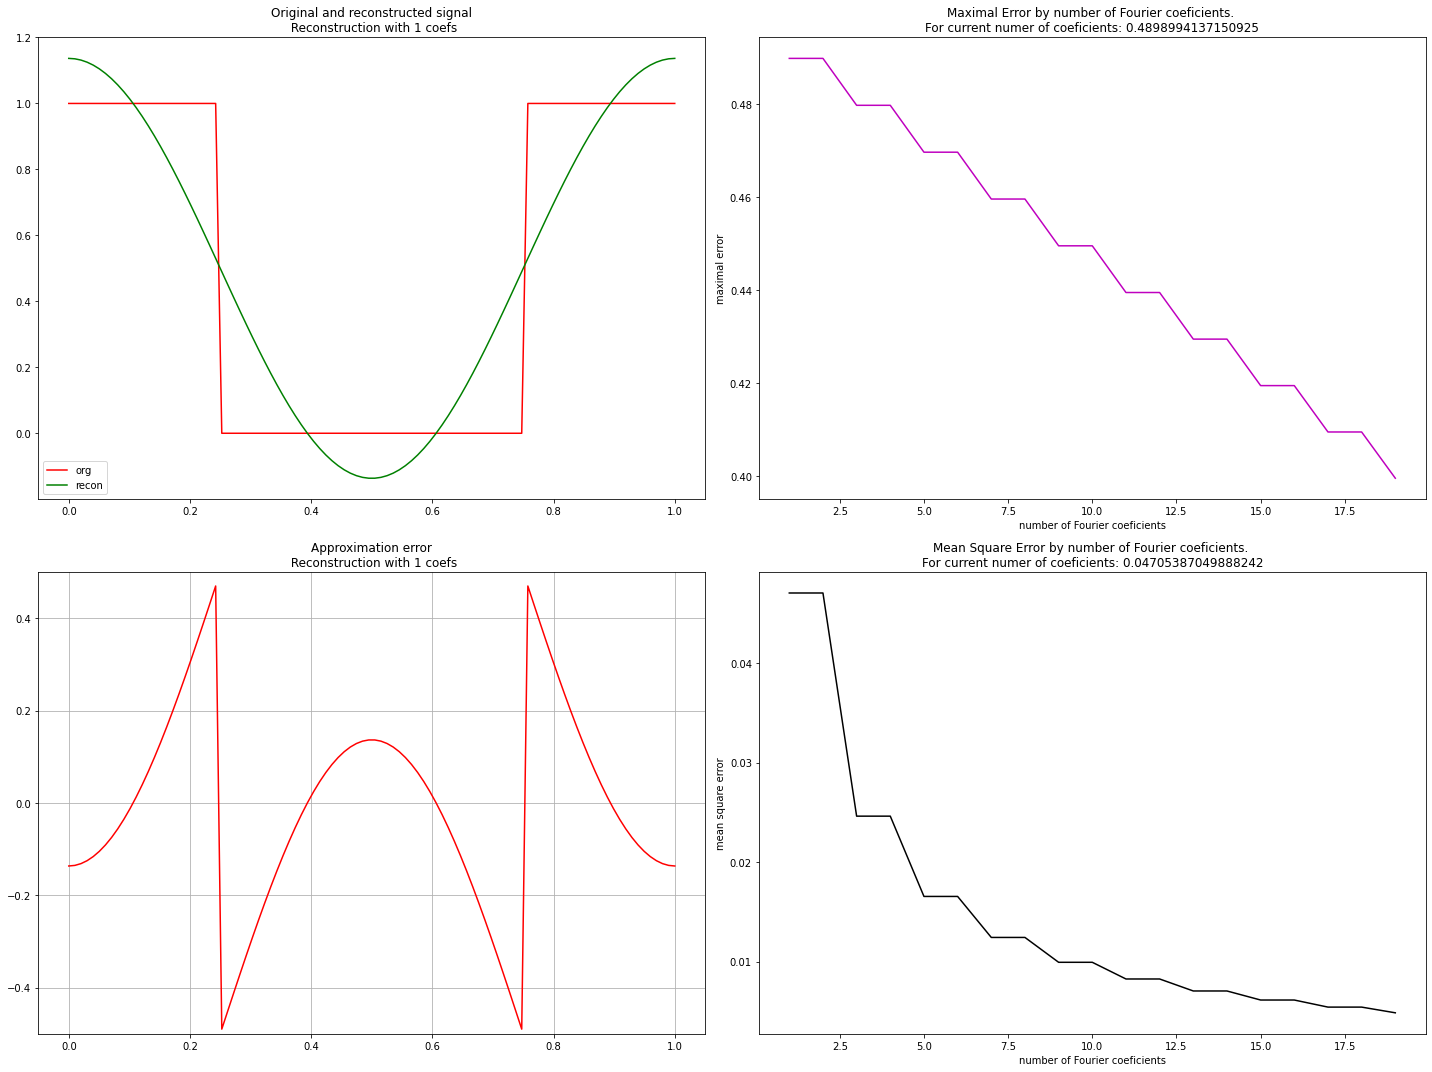

In [30]:
#UWAGA plik z klasą musi być w tym samym folderze co notebook (ten plik)

from xInteractiveFourier import *

FigSize  = (20, 15)
MaxNumCoeffs = 20  #max num coeff used for demo

F0, Fk  = determineFourierCoefficients(currFun, 0, T, DisplayCoeffs=False) #wspolczynniki ze wzoru punkt 3
Samples = sympy.lambdify(t, currFun, 'numpy')(np.linspace(0, T, 100)) #próbki aktalnie przybliżanej funkcji (100 próbek od 0 do T)

InteractiveFourier = xInteractiveFourier(MaxNumCoeffs)
InteractiveFourier.complexFourierSeries(F0, Fk, Samples, 0, T)
Demo = InteractiveFourier.createDemo(FigSize)
Demo

#1) Czerwony to oryginalny wykres, zielony to przybliżony
#2) Fioletowy - błąd maksymalny
#3) Przybliżenie błędu
#4) Błąd średniokwadratowy


----
## 6. Zadania dodatkowe
----
### Zadanie 6.1
Dla wyznaczonych funkcji z zadania 1 wyznacz wyrażenia na współczynniki zespolonego szeregu Fouriera w sposób analityczny i porównaj wyniki. 

### Zadanie 6.2
Wykonaj polecenia z zadań C, D i E dla trygonometrycznego szeregu Fouriera (wzory z wykładu/literatury). Zmodyfikuj funkcję $complexFourierSeries$ lub zbuduj na jej podstawię funkcję rekonstruującą sygnał na podstawie podanych wyrażeń na współczynniki a1, ak i bk. Porównaj otrzymane aproksymacje dla trygonometrycznego i zespolonego szeregu Fouriera. 

Wzory na ak, bk i a0 - PODPUNKT C: 
a0: 


1.0/pi

ak: 


Piecewise((-1.0*((-1)**k + 1)/(pi*(k**2 - 1)), Ne(k, 1)), (0, True))

bk: 


Piecewise((0, Ne(k, 1)), (0.5, True))

Wypisz a0, ak i bk - PODPUNKT D
a0:  1.0/pi
a1 = 0.0
a2 = -0.2122065908
a3 = -0.0
a4 = -0.0424413182
a5 = -0.0
a6 = -0.0181891364
a7 = -0.0
a8 = -0.0101050758
a9 = -0.0
a10 = -0.0064305028
a11 = -0.0
a12 = -0.0044518865
a13 = -0.0
a14 = -0.0032647168
a15 = -0.0
a16 = -0.0024965481
a17 = -0.0
a18 = -0.001970959
a19 = -0.0
a20 = -0.0015955383
b1 = 0.5
b2 = 0.0
b3 = 0.0
b4 = 0.0
b5 = 0.0
b6 = 0.0
b7 = 0.0
b8 = 0.0
b9 = 0.0
b10 = 0.0
b11 = 0.0
b12 = 0.0
b13 = 0.0
b14 = 0.0
b15 = 0.0
b16 = 0.0
b17 = 0.0
b18 = 0.0
b19 = 0.0
b20 = 0.0
Modyfikacja complexFourierSeries E - F0 = a0, Fk = 1/2 * (ak-i*bk), jak widać wynik jest ok zgadza się z tym jak liczyły Fk programy z zajęć, ale nie do końca wiem jak poprawić tą klasę żeby chciała współpracować z tak wyliczonym Fk
F0 to:  0.3183098861837907
Nowe policznone na podstawie ak i bk, Fk: 
F1 = -0.25j
F2 = (-0.1061032954+0j)
F3 = (-0+0j)
F4 = (-0.0212206591+0j)
F5 = (-0+0j)
F6 = (-0.0090945682+0j)
F7 = (-0+0j)
F8 = (-0.0050525379+0j)
F9 = (-0+0j)
F10

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in true_divide
  return select([not_equal(k, 1),True], [-1.0*((-1)**k + 1)/(pi*(k**2 - 1)),0], default=nan)


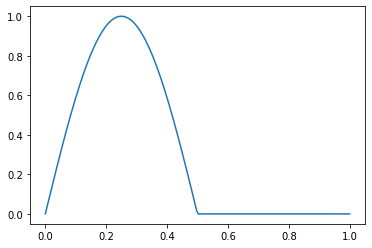

In [7]:
import sympy 
import numpy as np
import matplotlib.pyplot as plt 
from xInteractiveFourier import *


#Funkcja przymuje wzory na trygonometryczny szereg fouriera i wyznacza wzory na współczynniki - podpunkt C

#declare functions (fA, fB, ... fF)
def declare_function(t, T):
    #sympy.Picewise() służy do deklaracji funkcji z rózymi wzorami na różnych przedziałach
    fA = sympy.Piecewise((2*t/T, t<=T/2),(1-2*t/T, t>T/2)) #wzory funkcji w poszeczególnych przedzaiłach dla okresu T, w nawiasach przedały w których funkcja się zmienia
    fB = (-2*t)+1/T
    fC = sympy.Piecewise((2*t/T, t<=T/2), ((-2*t+2)/T, t>T/2))
    fD = sympy.Piecewise((1, t<=T/4), (0, t<=3*T/4), (1, t>=3*T/4))
    fE = sympy.Piecewise(((sympy.sin(2*sympy.pi*t/T)), t<=T/2), (0, t>T/2)) #sinus symboliczny z symby coś innego niż nympy
    fF = sympy.exp(-t/T)
    #selelect one function and draw
    currFun = fE
    return currFun


def determineFourierCoefficients_trigonometric(Function, RangeBeg, RangeEnd, DisplayCoeffs=True):
    print("Wzory na ak, bk i a0 - PODPUNKT C: ")
    #determine F0
    a0 = (1/T)*sympy.integrate(currFun, (t, RangeBeg, RangeEnd))
    #determine Fk
    #Trzeba pamiętać że musi być sympy.exp(), sympy.sqrt() itp. przy tworzeniu wzorów
    ak = (2/T)*sympy.integrate((currFun*sympy.cos(k * t * 2*sympy.pi/T)), (t, RangeBeg, RangeEnd))
    bk = (2/T)*sympy.integrate((currFun*sympy.sin(k * t * 2*sympy.pi/T)), (t, RangeBeg, RangeEnd))
    ak = sympy.simplify(ak)
    bk = sympy.simplify(bk)
    print("a0: ")
    display(a0)
    print("ak: ")
    display(ak)
    print("bk: ")
    display(bk)
    return a0, ak, bk


def display_coeffs(a0, ak, bk):
    print("Wypisz a0, ak i bk - PODPUNKT D")
    coeff_a0 = np.array(a0, dtype='double') #oblicza a0 i wpsije do tablicy
    coeff_ak = np.double(sympy.lambdify(k, ak, 'numpy')(np.arange(1,21))) #oblicza ak, dla każdego k od 1-10, k jest parametrem pod nią podstawiamy koljne numery
    coeff_bk = np.double(sympy.lambdify(k, bk, 'numpy')(np.arange(1,21))) #oblicza bk, dla każdego k od 1-10, k jest parametrem pod nią podstawiamy koljne numery
    #displaying a0, ak, bk
    print("a0: ", a0)
    for ki, iak in enumerate(coeff_ak): #pętla ki - kolejne numery wspolczynnika, a - kolejne obliczone ak
        print("a{} = {}".format(ki+1, iak.round(10))) #ładne wyświetlanie w nawiasach klamrowych beda zmienne
    for ki, ibk in enumerate(coeff_bk): #pętla ki - kolejne numery wspolczynnika, b - kolejne obliczone bk
        print("b{} = {}".format(ki+1, ibk.round(10))) #ładne wyświetlanie w nawiasach klamrowych beda zmienne
    return coeff_a0, coeff_ak, coeff_bk
    





#declare symbolic variable t (time) and period (T=1)
t = sympy.Symbol('t', real = 'True', nonzero = 'True') 
T = 1 #długość okresu
currFun = declare_function(t, T)
lam_current = sympy.lambdify(t, currFun, 'numpy')
t_vals = np.linspace(0, T, 200) #próbki na osi t, argumenty
f_vals = lam_current(t_vals) #wartośći funkcji currFun(t)
plt.plot(t_vals, f_vals)  #plot the selected function
NumberOfSamples = 200
a0, ak, bk = determineFourierCoefficients_trigonometric(currFun, 0, T)  #wzory na wspolczynniki z funkcji determine
#Stworzenie i wypisanie tablic zawierających wspolczynniki oraz zwrócenie ich do maina - podpunkt D
coeff_a0, coeff_ak, coeff_bk = display_coeffs(a0, ak, bk)
print("Modyfikacja complexFourierSeries E - F0 = a0, Fk = 1/2 * (ak-i*bk), jak widać wynik jest ok zgadza się z tym jak liczyły Fk programy z zajęć, ale nie do końca wiem jak poprawić tą klasę żeby chciała współpracować z tak wyliczonym Fk")
MaxNumCoeffs = 20  #max num coeff used for demo
F0 = coeff_a0
Fk = [None] * (MaxNumCoeffs-1)
print("F0 to: ", F0)
for i in range (MaxNumCoeffs-1):
    Fk[i] = np.cdouble((0.5) * (coeff_ak[i] - 1j * coeff_bk[i]))
    
print("Nowe policznone na podstawie ak i bk, Fk: ")
for ki, iFk in enumerate(Fk): #pętla ki - kolejne numery wspolczynnika, b - kolejne obliczone bk
        print("F{} = {}".format(ki+1, iFk.round(10))) #ładne wyświetlanie w nawiasach klamrowych beda zmienne

FigSize  = (16, 10)



